<h1 align="center">Assignment No :- 03</h1> 

# Title
Load the dataset: birthwt Risk Factors Associated with Low Infant Birth Weight at
https://raw.github.com/neurospin/pystatsml/master/datasets/birthwt.csv

1.Test the association of mother’s (age) age and birth weight  (bwt) using the correlation test and linear regeression.

2.Test the association of mother’s weight (lwt) and birth weight using the correlation testand linear regeression.

3.Produce two scatter plot of: (i) age by birth weight; (ii) mother’s weight by birth weight. Elaborate the Conclusion


In [10]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
df = pd.read_csv("birthwt.csv",index_col=0) # loading the dataset
df.head()
#df.info()

,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
low,,,,,,,,,
0,19,182,2,0,0,0,1,0,2523
0,33,155,3,0,0,0,0,3,2551
0,20,105,1,1,0,0,0,1,2557
0,21,108,1,1,0,0,1,2,2594
0,18,107,1,1,0,0,1,0,2600


### Converting Mother's Weight into Ounces

In [11]:
df['lwt'] = df['lwt']*16
df.head()

,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
low,,,,,,,,,
0,19,2912,2,0,0,0,1,0,2523
0,33,2480,3,0,0,0,0,3,2551
0,20,1680,1,1,0,0,0,1,2557
0,21,1728,1,1,0,0,1,2,2594
0,18,1712,1,1,0,0,1,0,2600


In [12]:
def calc_covariance(dataset1,dataset2):
    '''
 Def : Covariance is a measure to indicate the extent to which two random variables change in tandem.
 Formula : 1) Σ((X - X_mean)*(Y - Y_mean)) ∕ n
    '''

    mean1 = np.mean(dataset1)
    mean2 = np.mean(dataset2)
    return np.sum(np.multiply(dataset1-mean1,dataset2-mean2))/len(dataset1)


def correlation(dataset1,dataset2):
    '''
 Def : Correlation is a measure used to represent how strongly two random variables are related to each other.
 Formula : 1) cov(x,y)/(std(x)*std(y))
 '''
    cov =calc_covariance(dataset1,dataset2)
    sd1 = np.std(dataset1)
    sd2 = np.std(dataset2)
    
    return cov/(sd1*sd2)


## 1. Test the association of mother’s (age) age and birth weight (bwt) using the correlation test and linear regression.

### Using correlation coefficients test

Correlation between Mother's Age and Baby's weight: 0.0903178136685326


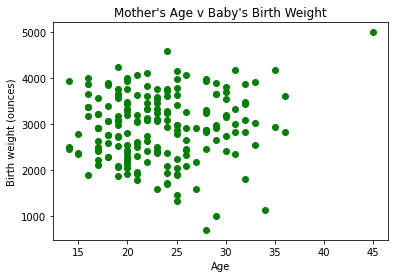

In [13]:
# Age of mother
age = df["age"]
age = age.to_numpy()

# Birth weight in ounces
birthwt = df["bwt"]
birthwt = birthwt.to_numpy()
print("Correlation between Mother's Age and Baby's weight:",correlation(age, birthwt))

plt.scatter(age,birthwt,c ="green")
plt.xlabel("Age")
plt.ylabel("Birth weight (ounces)")
plt.title("Mother's Age v Baby's Birth Weight")
plt.show()

__Conclusion:__
The correlation value is 0.02 which is very low, this means the correlation is almost non-existent between the maternal age and birth weight.


### 	Using simple linear regression :

Coefficients : 12.429712027714634
intercept : 2655.744469705171


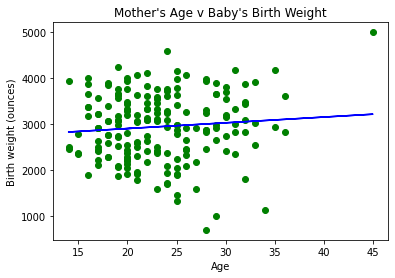

In [14]:
lr = LinearRegression()
age = age.reshape(-1,1)
lr.fit(age,birthwt)     # learning from the dataset  fits the regression line y = mx+c
y = lr.predict(age)     # predict birthwt from age
print("Coefficients :",lr.coef_[0])
print("intercept :",lr.intercept_)
plt.plot(age,y,color= "blue")        # plotting predictions
plt.scatter(age,birthwt,c= "green")  # plotting original data 
plt.xlabel("Age")
plt.ylabel("Birth weight (ounces)")
plt.title("Mother's Age v Baby's Birth Weight")
plt.show()

__Conclusion:__<br>
From the plot we can see almost flat regression line, this means baby's birth weight is almost not related to the maternal age.


## 2. Test the association of mother’s weight (weight) and birth weight (bwt) using the correlation test and linear regeression.

### Using correlation coefficients test

Correlation between Mother's Weight and Baby's weight: 0.18573328444909912


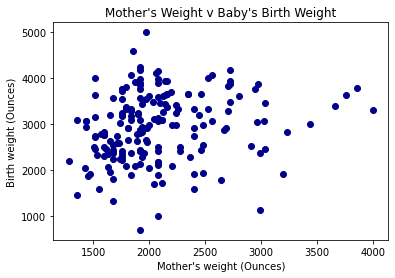

In [15]:
# Mother's weight during last menstrual period.(in ounces)
motherswt = df["lwt"]
motherswt =motherswt.to_numpy()

# converting in grams to pounds
#birthwt = birthwt/454

print("Correlation between Mother's Weight and Baby's weight:",correlation(motherswt,birthwt))
plt.xlabel("Mother's weight (Ounces)")
plt.ylabel("Birth weight (Ounces)")
plt.scatter(motherswt,birthwt,c = "darkblue")
plt.title("Mother's Weight v Baby's Birth Weight")
plt.show()

__Conclusion:__
The correlation value is 0.1559232701870693 which is positive correlation, but the value is small which means that higher the maternal weight better the birth weight of a baby but it has very little impact.


### 	Using simple linear regression :

Coefficients : 0.276819225396919
intercept : 2369.623517873997


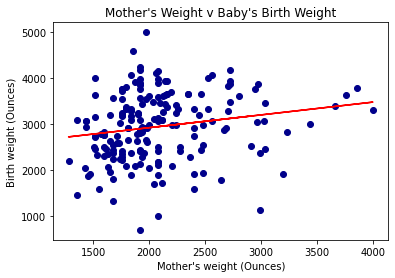

In [16]:
motherswt =motherswt.reshape(-1,1)
lr.fit(motherswt,birthwt)
z = lr.predict(motherswt)
print("Coefficients :",lr.coef_[0])
print("intercept :",lr.intercept_)
plt.plot(motherswt,z,c="red")
plt.scatter(motherswt,birthwt,c ="darkblue")
plt.xlabel("Mother's weight (Ounces)")
plt.ylabel("Birth weight (Ounces)")
plt.title("Mother's Weight v Baby's Birth Weight")
plt.show()

__Conclusion:__<br>
1. From the plot we can see a regression line with very small slope of 0.1378.<br>
2. This means baby's birth weight increase at very slow rate with respect to the maternal weight.
